# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Program Files\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
from sklearn.utils import shuffle
project_data = shuffle(project_data, random_state=42)
project_data = project_data[0:10000]

trimmed_k = 500
min_points_dbscan = 600

In [5]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## 1.2 preprocessing of `project_subject_categories`

In [6]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [7]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [8]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [9]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
105447      157247  p118457  ba6d96c0de8f0396f80fbf4b549c4217        Teacher   
69262       164744  p013133  60d8c1a778cab80242a2df0fd3e0ff09           Mrs.   

       school_state project_submitted_datetime project_grade_category  \
105447           NC        2016-07-05 16:12:10            Grades 9-12   
69262            NY        2016-10-15 16:53:46             Grades 3-5   

                             project_title  \
105447  Rain Barrels for the School Garden   
69262                     Wobbly Learning!   

                                          project_essay_1  \
105447  Environmental science students have no idea wh...   
69262   My students need six Learniture Active Learnin...   

                                          project_essay_2 project_essay_3  \
105447  We are in the process of filing lots of grants...             NaN   
69262   My students are excited to learn science but t...             NaN   

       project_essay_4                           project_resource_summary  \
105447             NaN  My students need these rain barrels to collect...   
69262              NaN  My students need five Wobble Chair,They have s...   

        teacher_number_of_previously_posted_projects  project_is_approved  \
105447                                             0                    1   
69262                                             20                    0   

                 clean_categories                clean_subcategories  \
105447  Math_Science SpecialNeeds  EnvironmentalScience SpecialNeeds   
69262                SpecialNeeds                       SpecialNeeds   

                                                    essay  
105447  Environmental science students have no idea wh...  
69262   My students need six Learniture Active Learnin...

In [10]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)


Environmental science students have no idea where food comes from, how important pollinators are or the care a garden takes. \r\nJBHS is a semi-rural, semi-urban, military-town high school of almost 2000 students with no agriculture program. Not only will environmental science students be involved in this garden, but the school environmental club and the exceptional students program will have vital roles too. The exceptional students program will be able to gain skills necessary to gain job skills for life post high school, even those bound to a wheelchair. Art teachers will be able to use this space for natural inspiration, math teachers for real world calculations, and science teachers for the nature of science. Students will be involved in citizen science projects.We are in the process of filing lots of grants to make this garden project become a reality. Many of the materials can be purchased elsewhere for cheaper costs. However due to this site's limitations I am requesting the ra

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20])
print(sent)
print("="*50)

I am very lucky this year to have a boisterous, but talented group of 28 third graders,  who are eager to learn and are open to any projects and assignments.  They are easily excited every time I give them a chance to debate a question or read a new book, solve a challenging problem, or write a personal narrative.  I have already noticed that many of my students are talented artists and musicians.  I am going to make visual arts my second focus this year after teaching the core curriculum.Our classroom is a print-rich environment.  We write and read throughout the day, and constantly use enrichment materials besides the textbooks.  There are many teacher-created tests and quizzes, custom made homework assignments, and other useful materials that should be given to the students daily.  Unfortunately, the printer we currently have in the classroom is not functioning properly and it causes some problems in the daily process of teaching and learning. Moreover, at the end of the day when it

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I am very lucky this year to have a boisterous, but talented group of 28 third graders,  who are eager to learn and are open to any projects and assignments.  They are easily excited every time I give them a chance to debate a question or read a new book, solve a challenging problem, or write a personal narrative.  I have already noticed that many of my students are talented artists and musicians.  I am going to make visual arts my second focus this year after teaching the core curriculum.Our classroom is a print-rich environment.  We write and read throughout the day, and constantly use enrichment materials besides the textbooks.  There are many teacher-created tests and quizzes, custom made homework assignments, and other useful materials that should be given to the students daily.  Unfortunately, the printer we currently have in the classroom is not functioning properly and it causes some problems in the daily process of teaching and learning. Moreover, at the end of the day when it

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

I am very lucky this year to have a boisterous but talented group of 28 third graders who are eager to learn and are open to any projects and assignments They are easily excited every time I give them a chance to debate a question or read a new book solve a challenging problem or write a personal narrative I have already noticed that many of my students are talented artists and musicians I am going to make visual arts my second focus this year after teaching the core curriculum Our classroom is a print rich environment We write and read throughout the day and constantly use enrichment materials besides the textbooks There are many teacher created tests and quizzes custom made homework assignments and other useful materials that should be given to the students daily Unfortunately the printer we currently have in the classroom is not functioning properly and it causes some problems in the daily process of teaching and learning Moreover at the end of the day when it is time to give out h 

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't", "nannan"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:05<00:00, 1769.88it/s]


In [18]:
# after preprocesing
preprocessed_essays[20]

'i lucky year boisterous talented group 28 third graders eager learn open projects assignments they easily excited every time i give chance debate question read new book solve challenging problem write personal narrative i already noticed many students talented artists musicians i going make visual arts second focus year teaching core curriculum our classroom print rich environment we write read throughout day constantly use enrichment materials besides textbooks there many teacher created tests quizzes custom made homework assignments useful materials given students daily unfortunately printer currently classroom not functioning properly causes problems daily process teaching learning moreover end day time give h w assignment i not chance give homework printout students go school sessions having printer save lot time effort could spent reading interesting book solving challenging problem'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also


from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 36011.67it/s]


## 1.5 Preparing data for models

In [20]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [21]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_cat = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer_cat.fit_transform(project_data['clean_categories'].values)
print(vectorizer_cat.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Music_Arts', 'Care_Hunger', 'Warmth', 'Literacy_Language', 'Health_Sports', 'AppliedLearning', 'History_Civics', 'Math_Science', 'SpecialNeeds']
Shape of matrix after one hot encodig  (10000, 9)


In [22]:
# we use count vectorizer to convert the values into one 
vectorizer_subcat = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer_subcat.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer_subcat.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['SpecialNeeds', 'Mathematics', 'ESL', 'CommunityService', 'TeamSports', 'Gym_Fitness', 'Warmth', 'FinancialLiteracy', 'NutritionEducation', 'ForeignLanguages', 'Health_Wellness', 'College_CareerPrep', 'Economics', 'PerformingArts', 'Literature_Writing', 'History_Geography', 'Health_LifeScience', 'Care_Hunger', 'Extracurricular', 'EnvironmentalScience', 'Civics_Government', 'CharacterEducation', 'Music', 'VisualArts', 'SocialSciences', 'AppliedSciences', 'ParentInvolvement', 'EarlyDevelopment', 'Literacy', 'Other']
Shape of matrix after one hot encodig  (10000, 30)


In [23]:
# you can do the similar thing with state, teacher_prefix and project_grade_category also

# for school_state



from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())

school_state_dict = dict(my_counter)
sorted_school_state_dict = dict(sorted(school_state_dict.items(), key=lambda kv: kv[1]))

vectorizer_sc_state = CountVectorizer(vocabulary=list(sorted_school_state_dict.keys()), lowercase=False, binary=True)
school_state_one_hot = vectorizer_sc_state.fit_transform(project_data['school_state'].values)
print(vectorizer_sc_state.get_feature_names())
print("Shape of matrix after one hot encodig ",school_state_one_hot.shape)

['PA', 'TN', 'TX', 'NV', 'CT', 'DE', 'NM', 'NC', 'MA', 'WY', 'MD', 'IN', 'ND', 'OK', 'NH', 'HI', 'NE', 'AK', 'VA', 'GA', 'AR', 'MT', 'MS', 'NY', 'RI', 'AL', 'WI', 'SD', 'LA', 'KS', 'CA', 'UT', 'ID', 'DC', 'FL', 'MN', 'MI', 'WA', 'OR', 'OH', 'VT', 'KY', 'NJ', 'IA', 'MO', 'ME', 'IL', 'SC', 'WV', 'AZ', 'CO']
Shape of matrix after one hot encodig  (10000, 51)


In [24]:
# for teacher_prefix
project_data["teacher_prefix"] = project_data["teacher_prefix"].fillna('Mrs.')


from collections import Counter
my_counter = Counter()
for word in project_data['teacher_prefix'].values:
    my_counter.update(word.split())

teacher_prefix_dict = dict(my_counter)
sorted_teacher_prefix_dict = dict(sorted(teacher_prefix_dict.items(), key=lambda kv: kv[1]))

vectorizer_prefix = CountVectorizer(vocabulary=list(sorted_teacher_prefix_dict.keys()), lowercase=False, binary=True)
teacher_prefix_one_hot = vectorizer_prefix.fit_transform(project_data['teacher_prefix'].values)
print(vectorizer_prefix.get_feature_names())
print("Shape of matrix after one hot encodig ",teacher_prefix_one_hot.shape)

['Ms.', 'Teacher', 'Mr.', 'Dr.', 'Mrs.']
Shape of matrix after one hot encodig  (10000, 5)


In [25]:
# for project_grade_category

from collections import Counter
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    word = word.replace('Grades', ' ')
    my_counter.update(word.split())
    
    

project_grade_category_dict = dict(my_counter)
sorted_project_grade_category_dict = dict(sorted(project_grade_category_dict.items(), key=lambda kv: kv[1]))



vectorizer_grade_cat = CountVectorizer(vocabulary=list(sorted_project_grade_category_dict.keys()), lowercase=False, binary=True)
vectorizer_grade_cat.fit_transform(project_data['project_grade_category'].values)
print(vectorizer_grade_cat.get_feature_names())

project_grade_one_hot = vectorizer_grade_cat.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",project_grade_one_hot.shape)

['9-12', '6-8', '3-5', 'PreK-2']
Shape of matrix after one hot encodig  (10000, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [26]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (10000, 6211)


In [27]:
# you can vectorize the title also 
# before you vectorize the title make sure you preprocess it

#### 1.5.2.2 TFIDF vectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (10000, 6211)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [29]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [30]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [31]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:03<00:00, 3229.24it/s]


10000
300


In [32]:
# average Word2Vec
# compute average word2vec for each title.
avg_w2v_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_titles.append(vector)

print(len(avg_w2v_titles))
print(len(avg_w2v_titles[0]))

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 52388.13it/s]


10000
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [33]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [34]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:24<00:00, 402.85it/s]


10000
300


In [35]:
# Similarly you can vectorize for title also

### 1.5.3 Vectorizing Numerical features

In [36]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [37]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data_train['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

# for number of previously submitted projects

previous_projects_scalar = StandardScaler()
previous_projects_scalar.fit(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
# print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
previous_projects_standardized = previous_projects_scalar.transform(project_data['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1))

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype int64 was converted to float64 by StandardScaler.



### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [38]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)

(10000, 9)
(10000, 30)


In [39]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
# from scipy.sparse import hstack
# # with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

In [40]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

__ Computing Sentiment Scores__

In [41]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

C:\Program Files\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning:

The twython library has not been installed. Some functionality from the twitter package will not be available.



neg: 0.01, compound: 0.9975, neu: 0.745, pos: 0.245, 

<h1>2. Clustering </h1>

<h2>2.1 Choose the best data matrix on which you got the best AUC</h2>

In [46]:
# W2V gave the best AUC score. Choosing W2V features for clustering

from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((previous_projects_standardized, teacher_prefix_one_hot,school_state_one_hot,project_grade_one_hot,
                 categories_one_hot,sub_categories_one_hot,avg_w2v_titles,avg_w2v_vectors, price_standardized))

X_dense = X.todense()
X.shape
actual_labels = project_data['project_is_approved']

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [46]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [47]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Dimensionality Reduction on the selected features </h2>

In [47]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
from sklearn.decomposition import KernelPCA

transformer = KernelPCA(n_components=trimmed_k, kernel='sigmoid')
X_transformed = transformer.fit_transform(X_dense)


<h2>2.5 Apply Kmeans</h2>

In [49]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

# class sklearn.cluster.KMeans(n_clusters=8, init=’k-means++’, n_init=10, max_iter=300, tol=0.0001, 
#                              precompute_distances=’auto’, verbose=0, random_state=None, copy_x=True, 
#                              n_jobs=None, algorithm=’auto’)[source]

from sklearn.cluster import KMeans
# applying k-means for different clusters

k_values = {1,2,3,4,5,6,7,8,9,10,15,20,25,30}
k_inertia = {}

for i in k_values:
    
    kmeans_i = KMeans(i,random_state=42)
    kmeans_i.fit(X_transformed)
    k_inertia[i] = kmeans_i.inertia_ 
    

Text(0.5,1,'K - means clustering')

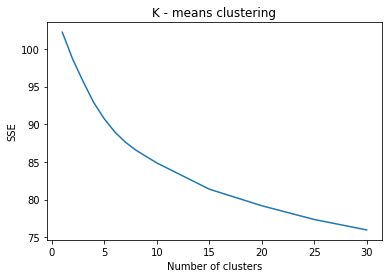

In [50]:
import matplotlib.pyplot as plt


plt.plot(k_inertia.keys(),k_inertia.values())
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('K - means clustering')

In [43]:
from sklearn.cluster import KMeans
final_clusters = 5

In [48]:
kmeans_k = KMeans(final_clusters,random_state=42)
kmeans_k.fit(X_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

Cluster Number:  1
Total number of points in cluster:  535
Approved projects labels:  415
Rejected projects labels:  120




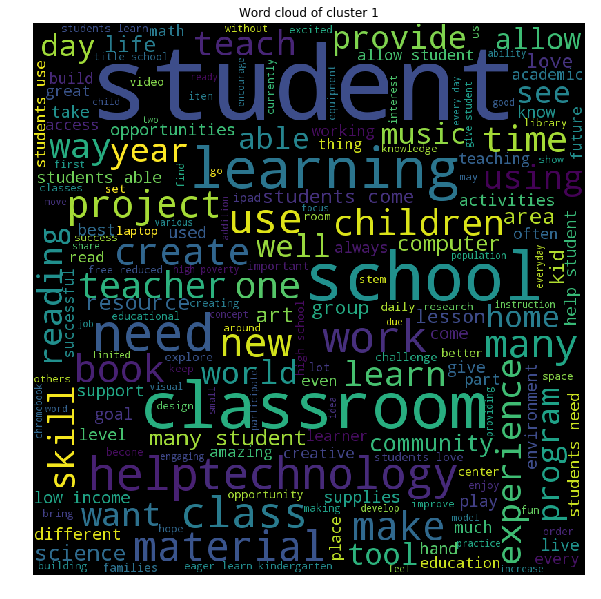

Cluster Number:  2
Total number of points in cluster:  3733
Approved projects labels:  3225
Rejected projects labels:  508




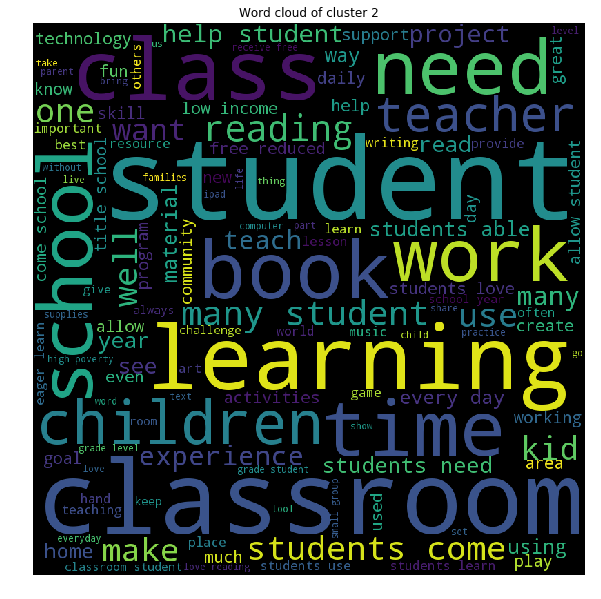

Cluster Number:  3
Total number of points in cluster:  319
Approved projects labels:  297
Rejected projects labels:  22




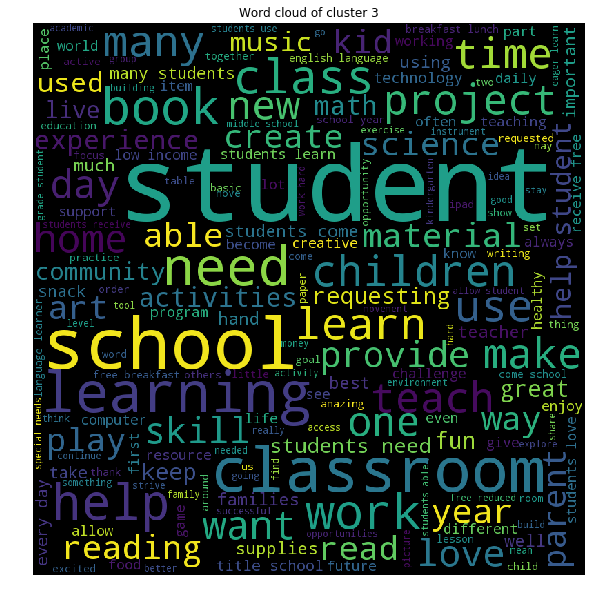

Cluster Number:  4
Total number of points in cluster:  3172
Approved projects labels:  2627
Rejected projects labels:  545




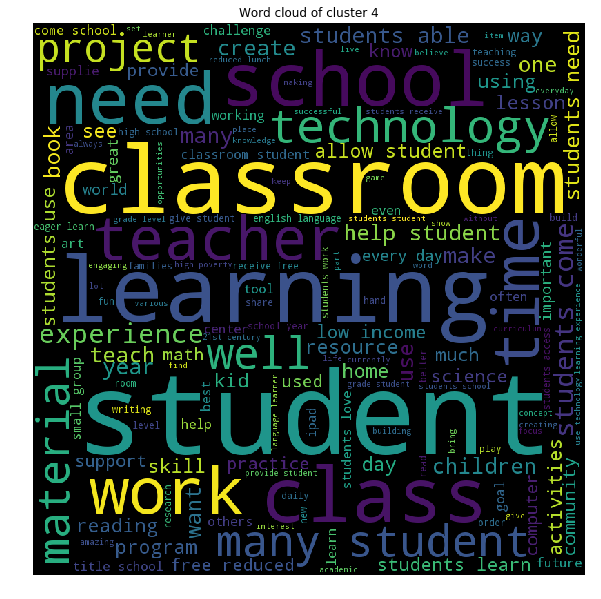

Cluster Number:  5
Total number of points in cluster:  2241
Approved projects labels:  1931
Rejected projects labels:  310




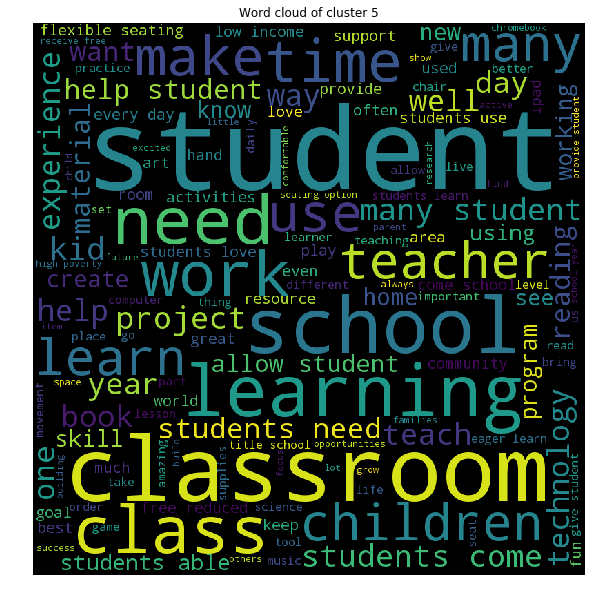

In [49]:
# https://www.geeksforgeeks.org/generating-word-cloud-python/
    
    
from wordcloud import WordCloud, STOPWORDS 

# find all points belonging to cluster 1
preprocessed_essays_DF = pd.DataFrame(preprocessed_essays)
cluster_labels = pd.DataFrame(kmeans_k.labels_)

k_clusters = {0,1,2,3,4}

for j in k_clusters:
    
    cluster_indexes_ofCluster_j = cluster_labels[cluster_labels[0]== j].index
    
    class_labels_of_cluster = actual_labels.iloc[cluster_indexes_ofCluster_j]
    
    print("Cluster Number: ",(j+1))
    
    print("Total number of points in cluster: ", len(class_labels_of_cluster))
    
    print("Approved projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==1]))
    
    print("Rejected projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==0]))

    print("\n")
    
    essays_of_current_cluster = preprocessed_essays_DF.iloc[cluster_indexes_ofCluster_j]
    

    
    comment_words = ' '
    # iterate through the csv file 
    for i in range(len(essays_of_current_cluster)): 

        # typecaste each val to string 
        val = essays_of_current_cluster.iloc[i][0]
        val = str(val)
        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black',  
                    min_font_size = 12).generate(comment_words) 
    
    string = "Word cloud of cluster " + str(j+1)
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(string)
    plt.show() 

In [52]:
X_transformed.shape

(10000, 500)

<h2>2.6 Apply AgglomerativeClustering</h2>

Total number of Clusters:  1
Cluster Number:  1
Total number of points in cluster:  10000
Approved projects labels:  8495
Rejected projects labels:  1505




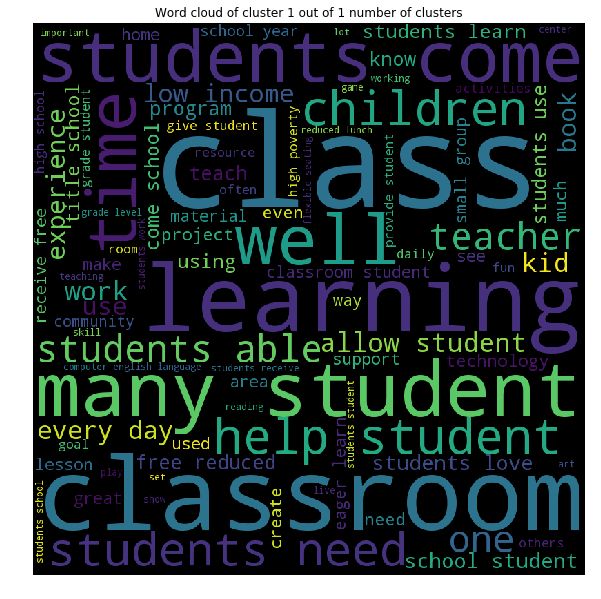

Total number of Clusters:  2
Cluster Number:  1
Total number of points in cluster:  9611
Approved projects labels:  8132
Rejected projects labels:  1479




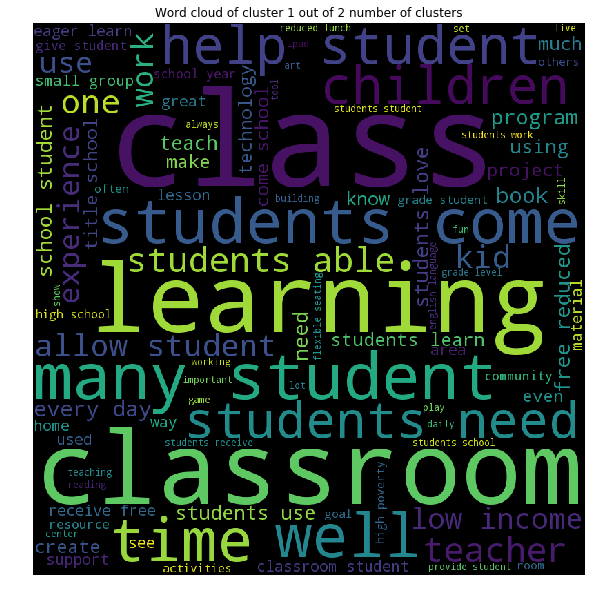

Total number of Clusters:  2
Cluster Number:  2
Total number of points in cluster:  389
Approved projects labels:  363
Rejected projects labels:  26




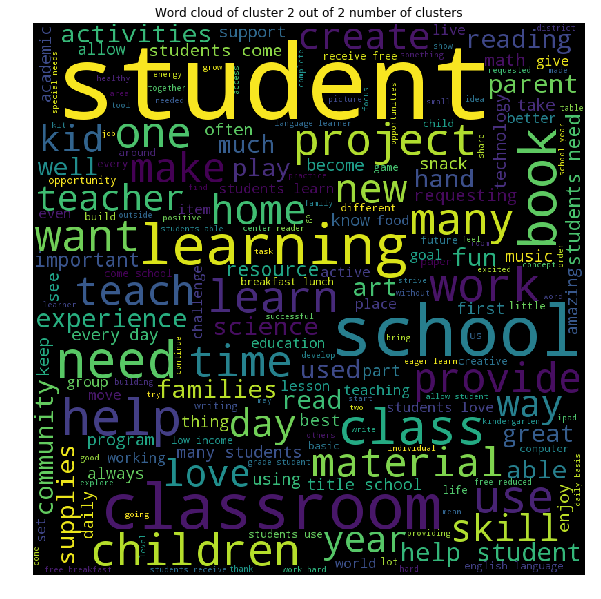

Total number of Clusters:  3
Cluster Number:  1
Total number of points in cluster:  9189
Approved projects labels:  7816
Rejected projects labels:  1373




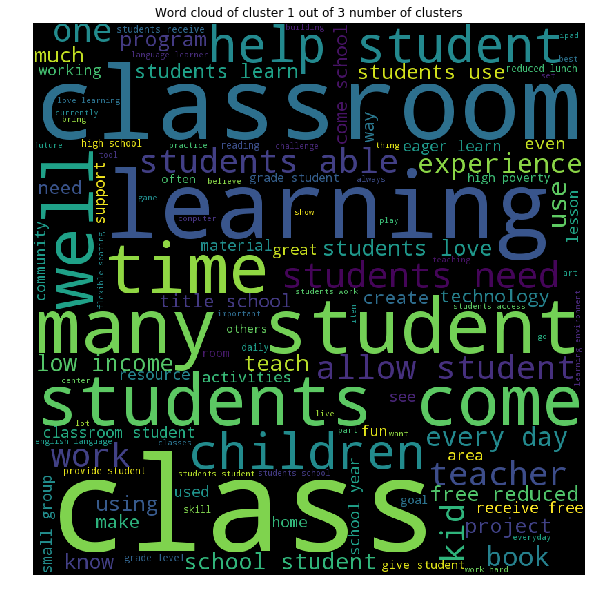

Total number of Clusters:  3
Cluster Number:  2
Total number of points in cluster:  389
Approved projects labels:  363
Rejected projects labels:  26




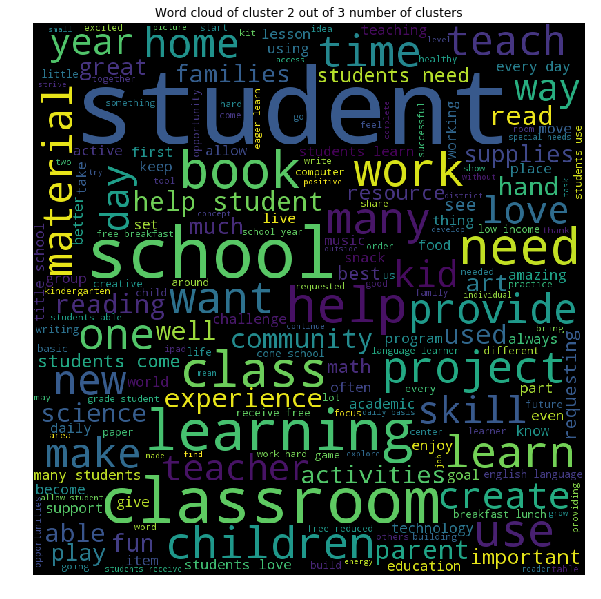

Total number of Clusters:  3
Cluster Number:  3
Total number of points in cluster:  422
Approved projects labels:  316
Rejected projects labels:  106




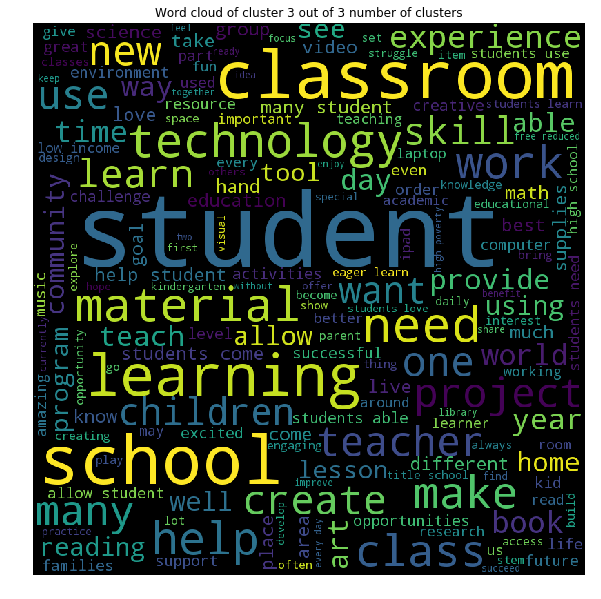

In [50]:
# class sklearn.cluster.AgglomerativeClustering(n_clusters=2, affinity=’euclidean’, memory=None, connectivity=None, 
#                                               compute_full_tree=’auto’, linkage=’ward’, pooling_func=’deprecated’, 
#                                               distance_threshold=None)

from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud, STOPWORDS 

k_values = np.array([1, 2, 3])

for k in k_values:
    
    agg_i = AgglomerativeClustering(k)
    agg_i.fit(X_transformed)

    
    # https://www.geeksforgeeks.org/generating-word-cloud-python/

    # find all points belonging to cluster 1
    preprocessed_essays_DF = pd.DataFrame(preprocessed_essays)
    cluster_labels = pd.DataFrame(agg_i.labels_)

    k_clusters = list(range(k))

    for j in k_clusters:

        cluster_indexes_ofCluster_j = cluster_labels[cluster_labels[0]== j].index

        class_labels_of_cluster = actual_labels.iloc[cluster_indexes_ofCluster_j]

        print("Total number of Clusters: ", k)
        print("Cluster Number: ",(j+1))

        print("Total number of points in cluster: ", len(class_labels_of_cluster))

        print("Approved projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==1]))

        print("Rejected projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==0]))

        print("\n")

        essays_of_current_cluster = preprocessed_essays_DF.iloc[cluster_indexes_ofCluster_j]



        comment_words = ' '
        # iterate through the csv file 
        for i in range(len(essays_of_current_cluster)): 

            # typecaste each val to string 
            val = essays_of_current_cluster.iloc[i][0]
            val = str(val)
            # split the value 
            tokens = val.split() 

            # Converts each token into lowercase 
            for i in range(len(tokens)): 
                tokens[i] = tokens[i].lower() 

            for words in tokens: 
                comment_words = comment_words + words + ' '


        wordcloud = WordCloud(width = 800, height = 800, 
                        background_color ='black',  
                        min_font_size = 12).generate(comment_words) 

        string = "Word cloud of cluster " + str(j+1) + " out of " + str(k) + " number of clusters"
        # plot the WordCloud image                        
        plt.figure(figsize = (8, 8), facecolor = None) 
        plt.imshow(wordcloud) 
        plt.axis("off") 
        plt.tight_layout(pad = 0) 
        plt.title(string)
        plt.show() 


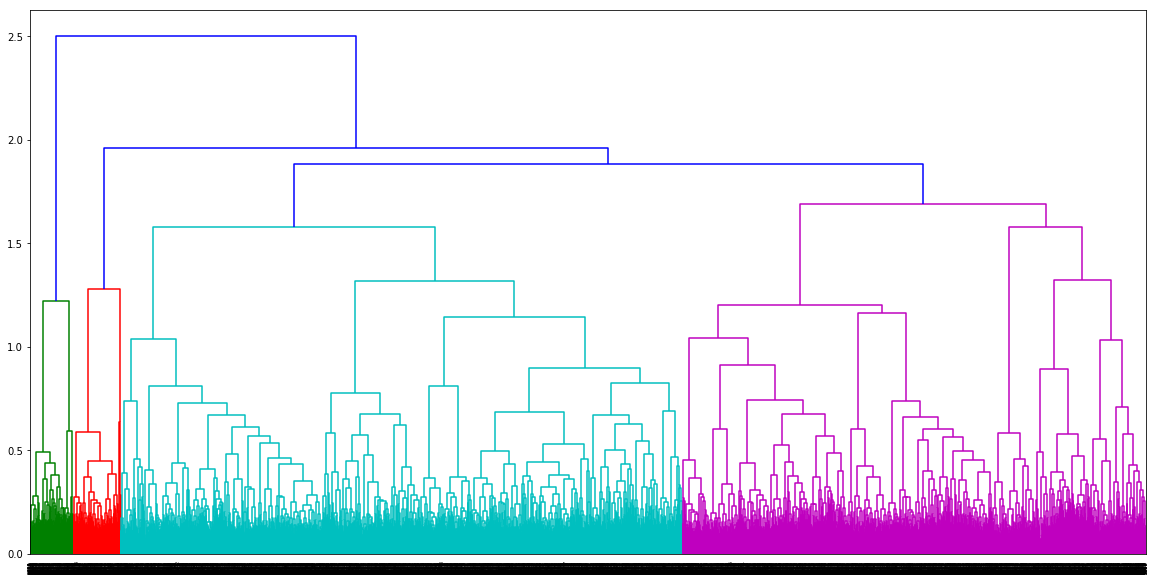

In [51]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X_transformed, 'ward')


plt.figure(figsize=(20, 10))  
dendrogram(linked,  
            orientation='top',            
            distance_sort='descending',
            show_leaf_counts=True)
plt.show() 

<h2>2.7 Apply DBSCAN</h2>

In [53]:
# https://scikit-learn.org/stable/modules/neighbors.html

from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=min_points_dbscan, algorithm='brute').fit(X_transformed)
distances, indices = nbrs.kneighbors(X_transformed)

min_point_distance = (np.array(distances[:,(min_points_dbscan-1)]))

min_point_distance.sort()

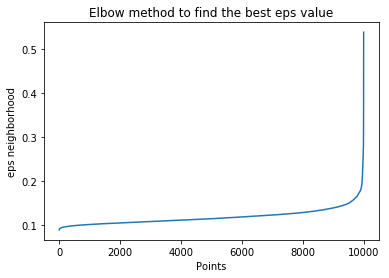

In [54]:
plt.plot(min_point_distance)
plt.ylabel("eps neighborhood")
plt.xlabel("Points")
plt.title("Elbow method to find the best eps value")
plt.show()


In [55]:
# Eps neighborhood is found to be 0.17 from the above plot

eps_n = 0.17

# class sklearn.cluster.DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, 
#metric_params=None, algorithm=’auto’, leaf_size=30, p=None, n_jobs=None)

from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps =eps_n, min_samples=min_points_dbscan)
dbscan_model.fit(X_transformed)

DBSCAN(algorithm='auto', eps=0.17, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=600, n_jobs=None, p=None)

Outlier points: 
Total number of outlier points:  11
Approved projects labels:  9
Rejected projects labels:  2




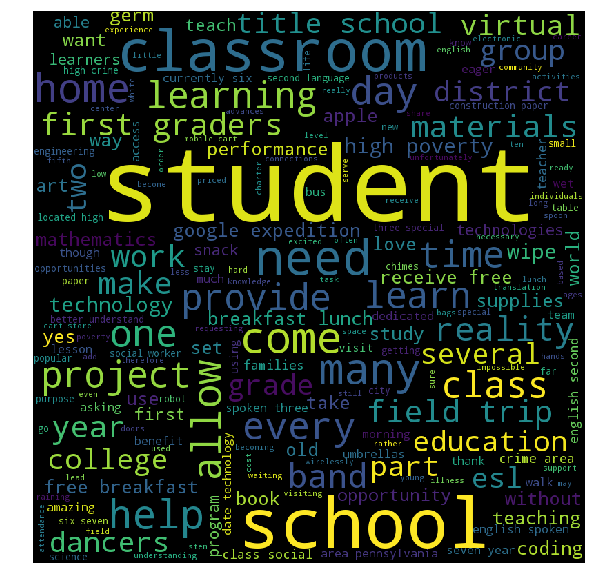

Total number of points in the cluster:  9989
Approved projects labels:  8486
Rejected projects labels:  1503




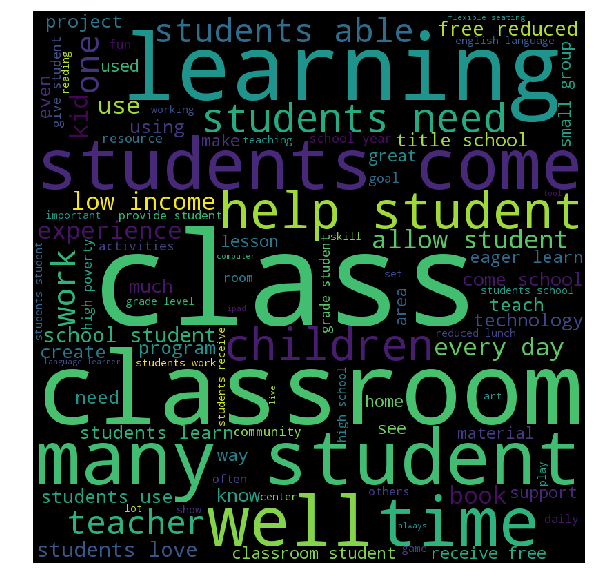

In [56]:
unique_labels = np.unique(dbscan_model.labels_)
cluster_labels = pd.DataFrame(dbscan_model.labels_)

for j in unique_labels:
    
    cluster_indexes_ofCluster_j = cluster_labels[cluster_labels[0]== j].index
    
    class_labels_of_cluster = actual_labels.iloc[cluster_indexes_ofCluster_j]
    
    if j==-1:
        print("Outlier points: ")
    
        print("Total number of outlier points: ", len(class_labels_of_cluster))
    
        print("Approved projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==1]))
    
        print("Rejected projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==0]))

    else:
            
        print("Total number of points in the cluster: ", len(class_labels_of_cluster))
    
        print("Approved projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==1]))
    
        print("Rejected projects labels: ", len(class_labels_of_cluster[class_labels_of_cluster==0]))
        
    print("\n")
    
    essays_of_current_cluster = preprocessed_essays_DF.iloc[cluster_indexes_ofCluster_j]
    

    
    comment_words = ' '
    # iterate through the csv file 
    for i in range(len(essays_of_current_cluster)): 

        # typecaste each val to string 
        val = essays_of_current_cluster.iloc[i][0]
        val = str(val)
        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='black',  
                    min_font_size = 12).generate(comment_words) 
    
    
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    
    plt.show() 

<h1>3. Conclusions</h1>


<h2>Observations from k-means</h2>
1. 2nd, 4th and 5th clusters have more number of points than other clusters.
2. STUDENT, LEARNING AND CLASSROOM are the most common words in clusters 2,4 and 5. 
3. However the word LEARNING is not a common and highly used word in 1 and 3 clusters.
4. Clusters are not formed with respect to the class labels of the instances.
5. Teacher is a common word in all the clusters except cluster 3.
6. Words like technology are not common in few clusters.
7. Essays played a major role in clustering the items. 

<h2> Observations from Agglomerative clustering </h2>
1. When the number of clusters = 3, 90% of the points are grouped in cluster 1. 
2. In cluster 1, a few words such as learning, student and school, etc. are the most common than other words in the cluster. 
3. In cluster 2 and 3, though the above mentioned words are present, there are other words which are almost equally common. 
4. 93% of the instances in cluster 2 are projects approved.

<h2> Observations on DBSCAN Clustering </h2>
1. The outliers detected have a few words such as virtual, graders, poverty, germ, band, google, expedition, etc. 
2. These words are not present in the non-outliers.

In [16]:

# https://stackoverflow.com/questions/9535954/printing-lists-as-tabular-data
from prettytable import PrettyTable
t = PrettyTable(['Clustering Technique', 'No. of Clusters','Cluster - 1 Popular words', 'Cluster -2 Popular words', 'Cluster -3 Popular words'])
t.add_row(['K-means', 5, 'student, classroom','student,class,school','student,classroom'])
t.add_row(['Agglomerative',3,'student,school,learning,class','student', 'student'])
t.add_row(['DBSCAN', '1', 'student, classroom, learning ','outlier pt-student', '-' ])
print(t)

+----------------------+-----------------+-------------------------------+--------------------------+--------------------------+
| Clustering Technique | No. of Clusters |   Cluster - 1 Popular words   | Cluster -2 Popular words | Cluster -3 Popular words |
+----------------------+-----------------+-------------------------------+--------------------------+--------------------------+
|       K-means        |        5        |       student, classroom      |   student,class,school   |    student,classroom     |
|    Agglomerative     |        3        | student,school,learning,class |         student          |         student          |
|        DBSCAN        |        1        | student, classroom, learning  |    outlier pt-student    |            -             |
+----------------------+-----------------+-------------------------------+--------------------------+--------------------------+
